# Pytorch



## Import

In [ ]:
import torch as t
t.__version__

'1.5.1+cu101'

## Working with tensors

### Types

In [ ]:
# Default type
t.get_default_dtype()

# default dtype for a tensor can only be a float type
# t.set_default_dtype(t.int)

# The default floating point dtype is initially torch.float32 Set the default floating point to torch.float64
t.set_default_dtype(t.float64)
t.get_default_dtype()

torch.float64

### Creating tensors

In [ ]:
# Tensor initialized with a specific array, the torch tensor always creates a copy of the data
tensor_arr = t.Tensor([[1,2,3], [4,5,6]])
tensor_arr
t.is_tensor(tensor_arr)


# An un-initialized Tensor of shape 2X2 allocated space in memory
tensor_uninitialized = t.Tensor(2, 2) 
tensor_uninitialized

# Tensors can be set to have specific data types
tensor_int = t.tensor([5, 3]).type(t.IntTensor) 
tensor_int

tensor_short = t.ShortTensor([1.0, 2.0, 3.0])   
tensor_short

tensor_float = t.tensor([1.0, 2.0, 3.0]).type(t.half)
tensor_float

# A tensor filled with a specific values
tensor_fill = t.full((2, 6), fill_value=10)
tensor_fill

# A tensor of size (2,4) containing all ones
tensor_of_ones = t.ones([2, 4], dtype=t.int32)
tensor_of_ones

# A tensor of size (2,4) like tensor_of_ones containing all zeroes
tensor_of_zeroes = t.zeros_like(tensor_of_ones)
tensor_of_zeroes

# Create an identity 5X5 tensor
tensor_eye = t.eye(5)
tensor_eye

# Get the list of indices of non-zero elements in a tensor - [ i, j ] index for non-zero elements
non_zero = t.nonzero(tensor_eye)
non_zero

# Sparse tensors
i = t.tensor([[0, 1, 1],
              [2, 2, 0]])
v = t.tensor([3, 4, 5], dtype=t.float32)
sparse_tensor = t.sparse_coo_tensor(i, v, [2, 5])
sparse_tensor.data

tensor(indices=tensor([[0, 1, 1],
                       [2, 2, 0]]),
       values=tensor([3., 4., 5.]),
       size=(2, 5), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

### Operations

In [ ]:
# numel() returns the number of elements in a tensor
t.numel(tensor_arr)

# Inplace / Out-of-place operations
initial_tensor = t.rand(2, 3) 
initial_tensor
initial_tensor.fill_(10) 

# The add() method does an out-of-place add operation and returns a new tensor. This is assigned to the new_tensor variable
new_tensor = initial_tensor.add(5)
new_tensor
# The original tensor is unchanged
initial_tensor

# The add_ method does an in-place add, changing the calling tensor
initial_tensor.add_(8)
initial_tensor

# # The new_tensor was a separate copy and is unaffected
# new_tensor

# # In-place version of sqrt()
# new_tensor.sqrt_()
# new_tensor

# Init linerly uniform tensor
x = t.linspace(start=0.1, end=10.0, steps=15)
x

# Splits a tensor into a specific number of chunks.
#   tensor (Tensor) – the tensor to split
#   chunks (int) – number of chunks to return
#   dim (int) – dimension along which to split the tensor
tensor_chunk = t.chunk(x, 3, 0)
tensor_chunk

# # Concatenates the sequence of tensors along the given dimension
# # All tensors must either have the same shape (except in the concatenating dimension) or be empty.
# tensor1 = tensor_chunk[0]
# tensor2 = tensor_chunk[1]
# tensor3 = t.tensor([3.0, 4.0, 5.0])

# t.cat((tensor1, tensor2, tensor3), 0)

# # accessing by index
# random_tensor = t.Tensor([[10, 8, 30], [40, 5, 6], [12, 2, 21]])
# random_tensor
# random_tensor[0, 1]
# random_tensor[1:, 1:]

# # Splits the tensor into chunks
# random_tensor_split = t.split(random_tensor, 2)
# random_tensor_split[0]
# random_tensor_split[1]

# # Tensor view - same as numpy.reshape() 
# random_tensor.size()
# # ... when reshaping, the number of elements needs to be the same
# resized_tensor = random_tensor.view(9)
# resized_tensor
# # resized_tensor.size()

# # Modifying the original tensor affects the resized_tensor as they both point to the same space in memory
# random_tensor[2, 2] = 100.0
# resized_tensor

# # Transpose - Returns a tensor that is a transposed version of input. The given dimensions dim0 and dim1 are swapped.
# initial_tensor
# tensor_transpose = t.transpose(initial_tensor, 0, 1)
# tensor_transpose

# # Sorting tensors - Tensors can be sorted along a specified dimension. If no dimension is specified, the last dimension is picked by default
# random_tensor
# sorted_tensor, sorted_indices = t.sort(random_tensor)
# sorted_tensor
# sorted_indices

(tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286]),
 tensor([3.6357, 4.3429, 5.0500, 5.7571, 6.4643]),
 tensor([ 7.1714,  7.8786,  8.5857,  9.2929, 10.0000]))

### Math operations

In [ ]:
# Pytorch supports a number of mathematical operations which can be performed on tensors. We take a look at a few of them here
tensor_float = t.FloatTensor([-1.1, -2.2, 3.3])
tensor_float

# Absolute values
tensor_abs = t.abs(tensor_float)      
tensor_abs

# add
initial_tensor
new_tensor = t.add(initial_tensor, 2)
new_tensor
t.add(initial_tensor, 10, new_tensor)

# add with "+"
rand1 = t.abs(t.randn(2, 3))
rand2 = t.abs(t.randn(2, 3))
add1 = rand1 + rand2
add1

# The add() method does an out-of-place add operation and returns a new tensor
add2 = t.add(rand1, rand2)
add2

# The div() and mul() functions can be used to divide and multiply the values in a tensor. Here, we do an element-wise division between two tensors
tensor = t.Tensor([[-1, -2, -3],
                    [ 1,  2,  3]])

tensor_div = t.div(tensor, tensor + 0.3)
tensor_div

tensor_mul = t.mul(tensor, tensor)
tensor_mul

# There will be occasions where you would like to set upper and lower limits for the values in a tensor. This is where the clamp function is used. The value of an element is set to:
#   min if xi < min
#   xi if min < xi < max
#   max if xi > max
# t.clamp(tensor, min=0, max=None) - with these parameter clamp acts as a RELU activation function
tensor_clamp = t.clamp(tensor, min=0, max=None)
tensor_clamp

# # Vector Multiplication
# # Dot product
# t1 = t.Tensor([1, 2])
# t2 = t.Tensor([10, 20])
# dot_product = t.dot(t1, t2) 
# dot_product

# # Matrix Vector product
# # If mat is a (n×m) tensor, vec is a 1-D tensor of size m, out will be 1-D of size n.
# matrix = t.Tensor([[1, 2, 3],[4, 5, 6]])
# vector = t.Tensor([0, 1, 2])
# matrix_vector = t.mv(matrix, vector)
# matrix_vector

# # Matrix multiplication
# another_matrix = t.Tensor([[10, 30],
#                            [20, 0],
#                            [0 , 50]])

# matrix_mul = t.mm(matrix, another_matrix)
# matrix_mul

# # Max / min - returns the indices of the maximum values of a tensor across a dimension.
# t.argmax(matrix_mul, dim=1)
# t.argmin(matrix_mul, dim=1)

tensor(50.)

## Pytorch / numpy interop

In [ ]:
import numpy as np
import torch

#### Converting tensor to numpy arrays

tensor = torch.rand(4, 3)
tensor

type(tensor)

### The numpy arrays use the same memory as the PyTorch tensor

numpy_from_tensor = tensor.numpy()                   
numpy_from_tensor

type(numpy_from_tensor)

torch.is_tensor(tensor)

torch.is_tensor(numpy_from_tensor)

#### The NumPy array and the Torch tensor share memory

numpy_from_tensor[0, 0] = 100.0

numpy_from_tensor

tensor

#### Converting a numpy array to a Tensor

numpy_arr = np.array([[1.0, 2.0, 3.0], 
                      [10.0, 20.0, 30.0],
                      [100.0, 200.0, 300.0]])

numpy_arr

tensor_from_numpy = torch.from_numpy(numpy_arr)
tensor_from_numpy

type(tensor_from_numpy)

torch.is_tensor(tensor_from_numpy)

#### The Numpy arrays and Tensor share the same memory The tensor and numpy_from_tensor are shallow copies and share the same memory as the original numpy array. Modifying the original array affects the values of both tensor and numpy_from_tensor

tensor_from_numpy[0] = 1
tensor_from_numpy

numpy_arr

#### Convert the data into a torch.Tensor. If the data is already a Tensor with the same dtype and device, no copy will be performed, otherwise a new Tensor will be returned

np_array_one = np.array([4, 8])
np_array_one

tensor_from_array_one = torch.as_tensor(np_array_one)
tensor_from_array_one

np_array_one[1] = 5
np_array_one

tensor_from_array_one

#### torch.tensor() reads out the data from whatever it is passed, and constructs a leaf variable

np_array_two = np.array([2, 2])
np_array_two

tensor_from_array_two = torch.tensor(np_array_two)

tensor_from_array_two

#### in this method the tensor and array do not share memory

np_array_two[1] = 4
np_array_two

tensor_from_array_two


tensor([2, 2])

## Pytorch CUDA

### To run all the lines you need multi-GPU environment

In [ ]:
import torch

torch.cuda.is_available()

# Initialize PyTorch’s CUDA state. You may need to call this explicitly if you are interacting with PyTorch via its C API

torch.cuda.init()

torch.cuda.current_device()

torch.cuda.device_count()

torch.cuda.memory_allocated()

torch.cuda.memory_cached()

cuda = torch.device('cuda')
cuda

cuda0 = torch.device('cuda:0')
cuda1 = torch.device('cuda:1')
cuda2 = torch.device('cuda:2')

cuda0, cuda1, cuda2

x = torch.tensor([10., 20.])
x

x_default = torch.tensor([10., 20.], device=cuda)
x_default

x0 = torch.tensor([10., 20.], device=cuda0)
x0

x1 = torch.tensor([10., 20.], device=cuda1)
x1

x2 = torch.tensor([10., 20.], device=cuda2)
x2

### Returns a copy of this object in CUDA memory. If this object is already in CUDA memory and on the correct device, then no copy is performed and the original object is returned.


# Transferring a tensor from CPU to GPU 0
y = x.cuda()

y

# Transferring a tensor from GPU 1 to GPU 0
y0 = x1.cuda()

y0

print('Outside with context: ', torch.cuda.current_device())

with torch.cuda.device(1):
    print('Inside with context: ', torch.cuda.current_device())

print('Outside with context again: ', torch.cuda.current_device())

with torch.cuda.device(1):
    a = torch.tensor([10., 20.])
    a0 = torch.tensor([10., 20.], device=cuda0)
    a1 = torch.tensor([10., 20.], device=cuda)

a
a0
a1
b1 = a0.to(device=cuda1)
b1

sum_a = a + a0
sum_a = a1 + a0
sum_ax = a1 + x1
sum_ax

torch.cuda.memory_allocated()
torch.cuda.memory_cached()
torch.cuda.empty_cache()
torch.cuda.memory_cached()

### torch.Tensor.new_* functions preserve the type and the device of the original tensor

preserve_context = x.new_full([2, 2], fill_value=1.1)
preserve_context
preserve_context0 = x0.new_full([2, 2], fill_value=1.1)
preserve_context0
preserve_context1 = x1.new_full([2, 2], fill_value=1.1)
preserve_context1

## Autograd


In [ ]:
import torch

#### We dont need to specify requires_grad = False, since by default it flags it as False"""

tensor1 = torch.Tensor([[1, 2, 3], 
                       [4, 5, 6]])
tensor1

tensor2 = torch.Tensor([[7, 8, 9], 
                        [10, 11, 12]])

tensor2

#### The requires_grad property defines whether to track operations on this tensor. By default, it is set to False

tensor1.requires_grad
tensor2.requires_grad

#### The requires\_grad\_() function sets requires_grad to True

tensor1.requires_grad_()
tensor1.requires_grad
tensor2.requires_grad

#### The .grad property stores all the gradients for the tensor. However, there are no gradients yet

print(tensor1.grad)

#### The .grad_fn property contains the gradient function. This has not been set either

print(tensor1.grad_fn)

#### Create a new output tensor from our original tensor

output_tensor = tensor1 * tensor2

#### The requires_grad property has been derived from the original tensor

output_tensor.requires_grad

#### There are still no gradients

print(output_tensor.grad)

#### But there is a gradient function. This is from the multiplication operation performed on the original tensor

print(output_tensor.grad_fn)

#### The original tensor still does not have a gradient function

print(tensor1.grad_fn)

print(tensor2.grad_fn)

#### Changing the operation for the output changes the gradient function
# The gradient function only contains the last operation. Here, even though there is a multiplication as well as a mean, only the mean calculation is recorded as the gradient function

output_tensor = (tensor1 * tensor2).mean()
print(output_tensor.grad_fn)

#### In spite of setting a gradient function for the output, the gradients for the input tensor is still empty

print(tensor1.grad)

#### To calculate the gradients, we need to explicitly perform a backward propagation

output_tensor.backward()

#### The gradients are now available for the input tensor
# Future calls to backward will accumulate gradients into this vector

print(tensor1.grad)

#### The gradient vector is the same shape as the original vector

tensor1.grad.shape, tensor1.shape

print(tensor2.grad)

print(output_tensor.grad)

#### The requires_grad property propagates to other tensors. Here the new_tensor is created from the original tensor and gets the original's value of requires_grad

new_tensor = tensor1 * 3
print(new_tensor.requires_grad)

new_tensor

#### Turning off gradient calculations for tensors You can also stops autograd from tracking history on newly created tensors 
# with requires_grad=True by wrapping the code block in with torch.no_grad():

with torch.no_grad():
    new_tensor = tensor1 * 3
    print('new_tensor = ', new_tensor)
    print('requires_grad for tensor = ', tensor1.requires_grad)
    print('requires_grad for tensor = ', tensor2.requires_grad)
    print('requires_grad for new_tensor = ', new_tensor.requires_grad)

#### Can turn off gradient calculations performed within a function

def calculate(t):
    return t * 2

@torch.no_grad()
def calculate_with_no_grad(t):
    return t * 2

result_tensor = calculate(tensor1)
result_tensor

result_tensor.requires_grad

result_tensor_no_grad = calculate_with_no_grad(tensor1)
result_tensor_no_grad

result_tensor_no_grad.requires_grad

#### Can explicitly enabled gradients within a no_grad() context. There is an equivalent @torch.enable_grad() as well

with torch.no_grad():
    
    new_tensor_no_grad = tensor1 * 3
    
    print('new_tensor_no_grad = ', new_tensor_no_grad)
    
    with torch.enable_grad():
        
        new_tensor_grad = tensor1 * 3
    
        print('new_tensor_grad = ', new_tensor_grad)

### Result tensors get requires_grad properties from input tensors

tensor_one = torch.tensor([[1.0, 2.0], 
                           [3.0, 4.0]], requires_grad=True)  
tensor_one

tensor_two = torch.Tensor([[5, 6], 
                           [7, 8]])
tensor_two

#### enable the gradients for  two tensors

tensor_one.requires_grad

tensor_two.requires_grad_()

final_tensor = (tensor_one + tensor_two).mean()
final_tensor

#### final tensor has gradients enabled as it derives from the tensors its made up of

final_tensor.requires_grad

print(tensor_one.grad)

print(tensor_two.grad)

final_tensor.backward()

print(tensor_one.grad)

print(tensor_two.grad)

print(final_tensor.grad)

#### Detach tensors from the computation graph

detached_tensor = tensor_one.detach()
detached_tensor

tensor_one

mean_tensor = (tensor_one + detached_tensor).mean()

mean_tensor.backward()

tensor_one.grad

print(detached_tensor.grad)

## Linear regression

### Procedural

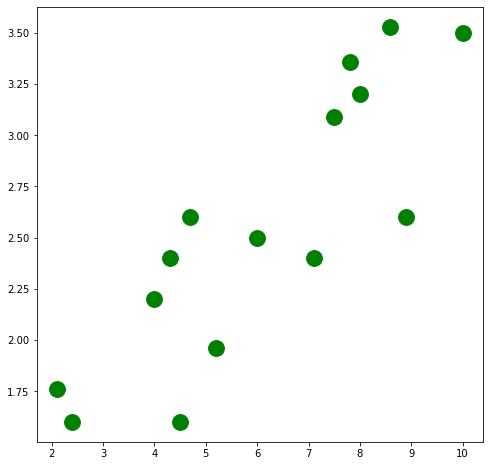

requires_grad for X_train:  False
requires_grad for Y_train:  False
100 1.9384205341339111
200 1.7927601337432861
300 1.72433602809906
400 1.6921942234039307
500 1.6770960092544556
600 1.6700031757354736
700 1.666671872138977
800 1.6651062965393066
900 1.664371132850647
1000 1.6640263795852661
1100 1.663864254951477
1200 1.6637871265411377
1300 1.6637519598007202
1400 1.663735032081604
1500 1.663726568222046
1600 1.6637227535247803
1700 1.6637212038040161
1800 1.663720726966858
1900 1.6637204885482788
2000 1.6637197732925415
2100 1.663719654083252
2200 1.6637201309204102
2300 1.6637201309204102
2400 1.6637200117111206
2500 1.6637200117111206
2600 1.6637202501296997
2700 1.6637200117111206
2800 1.663719892501831
2900 1.663719892501831
3000 1.663719892501831
3100 1.663719892501831
3200 1.663719892501831
3300 1.663719892501831
3400 1.663719892501831
3500 1.663719892501831
3600 1.663719892501831
3700 1.663719892501831
3800 1.663719892501831
3900 1.663719892501831
4000 1.663719892501831
w1:

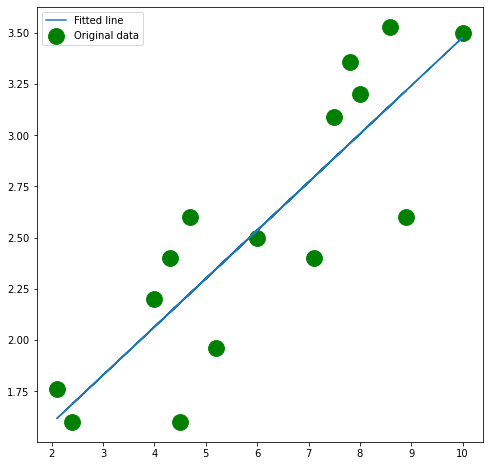

w1 with sklearn is : [[0.23550543]]
b1 with sklearn is : [1.1227363]


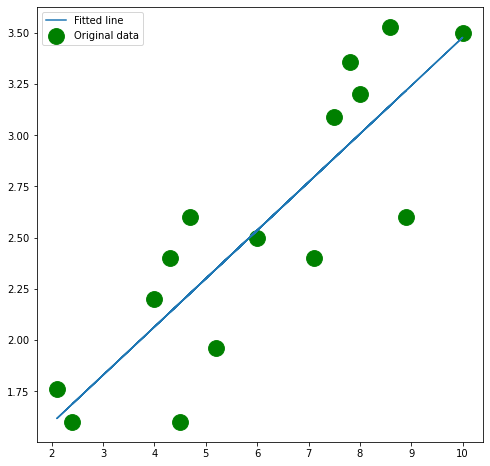

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating Dataset. A simple dataset using numpy arrays

# x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
#                      [7.8], [8.9], [5.2], [4.59], [2.1], 
#                      [8], [5], [7.5], [5], [4],
#                      [8], [5.2], [4.9], [3], [4.7], 
#                      [4], [4.8], [3.5], [2.1], [4.1]],
#                     dtype = np.float32)

# y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
#                      [3.3], [2.6], [1.96], [3.13], [1.76], 
#                      [3.2], [2.1], [1.6], [2.5], [2.2], 
#                      [2.75], [2.4], [1.8], [1], [2], 
#                      [1.6], [2.4], [2.6], [1.5], [3.1]], 
#                     dtype = np.float32)

x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

#### View the data

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.show()

import torch

#### Converting data to pytorch tensors

X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

#### Set the details for our neural network. Input, output and hidden layer sizes plus the learning rate

input_size = 1 
hidden_size = 1
output_size = 1 
learning_rate = 0.001

#### Create random Tensors for weights and biases. Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

b1 = torch.rand(hidden_size, output_size, requires_grad=True)
b1.shape
w1
b1

## Training
#### Foward Pass:
### * Predicting Y with input data X
### * we use y = ax+b  for predictions as it is a linear regression problem
### * finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function

#### Finding Loss:
### * Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
### * backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
### * After this call w1.grad and b1.grad will be Tensors holding the gradient of the loss with respect to w1 and b1 respectively.

#### Manually updating the weights
### * weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
### * reducing weight with multiple of learning rate and gradient
### * manually zero the weight gradients after updating weights

for iter in range(1, 4001): # epoch
    y_pred = X_train.mm(w1).clamp(min=0).add(b1) # batched mx + b
    loss = (y_pred-Y_train).pow(2).sum() 
    
    if iter % 100 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    # for weight update turn of gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

# 100 1.663813591003418
# 200 1.663763403892517

print ('w1: ', w1)
print ('b1: ', b1)

#### Checking the output. Converting data into a tensor

x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

#### Get the predicted values using the weights 
# Using final weights and biases calculated from our training in order to get the predicted values

predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

#### Convert the prediction to a numpy array. This will be used to plot the regression line in a plot

predicted = predicted_in_tensor.detach().numpy()
predicted

#### Plotting. Our training has produced a rather accurate regression line

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend() 
plt.show()

#### We check the weights and biases with sklearn linear regression to see if they match the weights and biases calculated by neural network"""

import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

print("w1 with sklearn is :", reg.coef_)

print("b1 with sklearn is :", reg.intercept_)

predicted = reg.predict(x_train)

predicted

plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend() 
plt.show()

### Using opimizers

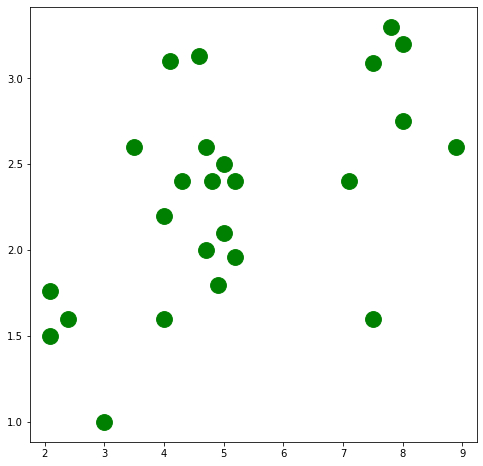

0 117.84172058105469
1 48.382164001464844
2 24.19368553161621
3 15.8989839553833
4 13.105521202087402
5 12.173297882080078
6 11.859430313110352
7 11.748523712158203
8 11.703741073608398
9 11.680420875549316


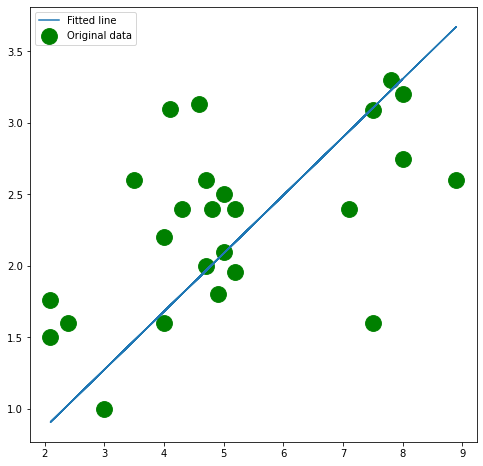

0 100.43992614746094
1 58.61066436767578
2 36.05323028564453
3 23.873849868774414
4 17.339990615844727
5 13.864253044128418
6 12.02961254119873
7 11.066725730895996
8 10.562698364257812
9 10.298392295837402
10 10.158581733703613
11 10.083142280578613
12 10.040874481201172
13 10.015663146972656
14 9.999205589294434
15 9.987241744995117
16 9.977584838867188
17 9.969115257263184
18 9.961258888244629
19 9.953722953796387
20 9.946359634399414
21 9.9390869140625
22 9.931872367858887
23 9.92469310760498
24 9.917536735534668
25 9.910402297973633
26 9.903284072875977
27 9.896181106567383
28 9.889094352722168
29 9.882022857666016
30 9.87496280670166
31 9.867918014526367
32 9.860889434814453
33 9.85387134552002
34 9.846870422363281
35 9.839882850646973
36 9.832908630371094
37 9.825948715209961
38 9.819002151489258
39 9.812068939208984
40 9.80514907836914
41 9.79824447631836
42 9.79135513305664
43 9.784476280212402
44 9.77761173248291
45 9.770764350891113
46 9.76392650604248
47 9.757104873657227
4

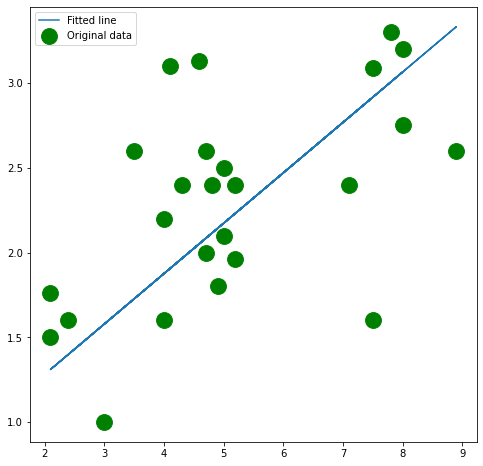

In [5]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

x = torch.from_numpy(x_train) 
y = torch.from_numpy(y_train)

x.size()

"""- inp - input dimension
- hidden - hidden dimension
- out - output dimension
"""

inp = 1
hidden = 5
out = 1

"""#### Creating model using nn.Sequential()

- Use the nn package to define our model as a sequence of layers. 
- nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output https://pytorch.org/docs/0.3.1/nn.html#sequential.
- Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html.
"""

model = torch.nn.Sequential(
          torch.nn.Linear(inp, hidden),
          # torch.nn.ReLU(),
          torch.nn.Linear(hidden, out)
      )

"""the nn package also contains definitions of popular loss functions; in thiscase we will use <b>Mean Squared Error (MSE) </b> as our loss function."""

loss_fn = torch.nn.MSELoss(reduction='sum')

"""- Forward pass:  
compute predicted y by passing x to the model. Module objects override the __call__ operator so you can call them like functions. When doing so you pass a Tensor of input data to the Module and it produces a Tensor of output data.


- loss:
We pass Tensors containing the predicted and true values of y, and the loss function returns a Tensor containing the loss.


- model.zero_grad():
Zero the gradients before running the backward pass


- Backward pass: 
compute gradient of the loss with respect to all the learnable parameters of the model. Internally, the parameters of each Module are stored in Tensors with requires_grad=True, so this call will compute gradients for
all learnable parameters in the model


- update the weights manually using gradient descent. Each parameter is a Tensor, so we can access its gradients like we did before.
"""

learning_rate = 1e-4

for i in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad # SGD

predicted_in_tensor = model(x)
predicted_in_tensor

predicted = predicted_in_tensor.detach().numpy()
predicted

"""#### Plotting
Our training has produced a rather accurate regression line
"""

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label = 'Fitted line ')
plt.legend()
plt.show()



"""Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with torch.no_grad() or .data to avoid tracking history in autograd).

#### The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

Use the nn package to define our model and loss function
"""

model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

"""- Use the optim package to define an Optimizer that will update the weights of the model for us
- Here we will use SGD;the optim package contains many other optimization algorithms.
- The first argument to the SGD constructor tells the optimizer which Tensors it should update.

Before the backward pass, use the optimizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model). This is because by default, gradients are accumulated in buffers( i.e, not overwritten) whenever .backward() is called.

Calling the step function on an Optimizer makes an update to its parameters
"""

learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#### Get the predicted values

predicted_in_tensor = model(x)
predicted_in_tensor

#### Convert the prediction to a numpy array. This will be used to plot the regression line in a plot

predicted = predicted_in_tensor.detach().numpy()
predicted

plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()

## Device agnostic code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
torch.cuda.is_available()

True

In [ ]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to acummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(255.6528, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 255.65283203125
tensor(20.8739, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 20.873924255371094
tensor(1.7235, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 1.7235102653503418
tensor(0.1612, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.16123752295970917
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.03357722982764244
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.0229363851249218
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.02184293232858181
tensor(0.0215, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.02153063751757145
tensor(0.0213, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.021284669637680054
tensor(0.0210, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.02104652114212513
tensor(0.0208, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, loss

[[ 0.8371883]
 [ 2.8606346]
 [ 4.884081 ]
 [ 6.9075274]
 [ 8.930974 ]
 [10.95442  ]
 [12.977866 ]
 [15.001312 ]
 [17.02476  ]
 [19.048204 ]
 [21.071651 ]]


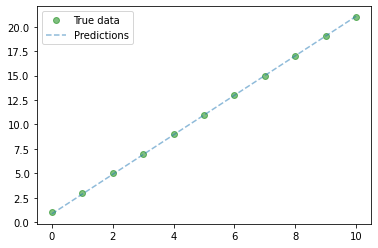

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Vizualization of graphs


In [ ]:
import numpy as np 
import torch
import torch.nn as nn

W = torch.randn(6)
x = torch.tensor([10.0, 10.0, 10.0, 10.0, 10.0, 10.0])
b = torch.tensor(3)

W

y = W*x + b

y

#### Working Dynamically

W*x

b

W1 = torch.tensor(6)
W2 = torch.tensor(6)
W3 = torch.tensor(6)

x1 = torch.tensor([2, 2, 2])
x2 = torch.tensor([3, 3, 3])
x3 = torch.tensor([4, 4, 4])

b = torch.tensor(10)

W1, W2, W3

intermediate_value = W1 * x1 + W2 * x2

intermediate_value

final_value = W1 * x1 + W2 * x2 + W3 * x3 + b

final_value

### Viewing PyTorch computation graphs: https://github.com/waleedka/hiddenlayer

#### Computation Graph

# !pip install hiddenlayer
import hiddenlayer as hl

x_train = np.array ([[1.7], [2.5], [5.5], [7.9], [8.8],
                     [2.4],[2.4], [8.89], [5], [4.4]],
                    dtype = np.float32)

y_train = np.array ([[1.9], [2.68], [4.22], [8.19], [9.69],
                     [3.4],[2.6], [8.8], [5.6], [4.7]],
                    dtype = np.float32)

X_train = torch.tensor(x_train)
Y_train = torch.tensor(y_train)

X_train.shape

inp = 1
out = 1

hid = 100

model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, out))

hl.build_graph(model1, torch.zeros([10, 1]))
hl.build_graph(model1, torch.zeros([1]))

model2 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, hid),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hid, out))

hl.build_graph(model2, torch.zeros([10, 1]))
hl.build_graph(model2, torch.zeros([1]))

inp = 2
out = 1

hid = 100

model3 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, hid),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hid, out))

hl.build_graph(model3, torch.zeros([10, 2]))
hl.build_graph(model3, torch.zeros([2]))

# Fast.ai

In [ ]:
import fastai
fastai.__version__

'1.0.61'